In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
data = {
    'CustomerID': list(range(1, 21)),
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
               'Male','Female','Male', 'Female', 'Female', 'Female', 'Male', 'Male',
               'Female', 'Male', 'Male', 'Female'],
    'Age': [19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24, 37, 22, 35, 20, 52, 35],
    'Annual Income (k$)': [15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15, 77, 13, 79, 35, 66, 29, 98]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
X= df[['Annual Income (k$)', 'Spending Score (1-100)']]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

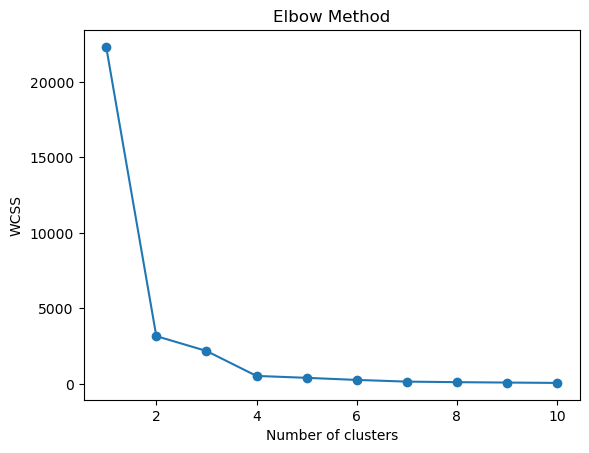

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


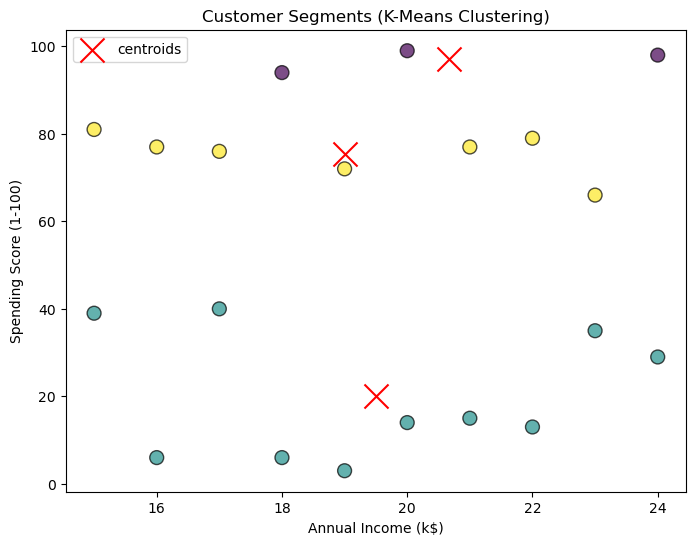

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    X['Annual Income (k$)'],
    X['Spending Score (1-100)'],
    c=df['Cluster'],
    cmap='viridis',
    s=100,
    alpha=0.7,
    edgecolors='k'
)print(df[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c='red',
    marker='x',
    label='centroids'
)

plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [ ]:
print(df[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])

    CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0            1                  15                      39        1
1            2                  15                      81        2
2            3                  16                       6        1
3            4                  16                      77        2
4            5                  17                      40        1
5            6                  17                      76        2
6            7                  18                       6        1
7            8                  18                      94        0
8            9                  19                       3        1
9           10                  19                      72        2
10          11                  20                      14        1
11          12                  20                      99        0
12          13                  21                      15        1
13          14                  21              